<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning%20Interview%20Prep%20Questions/Unsupervised%20Learning%20Algorithms/Clustering%20Algorithms/Hierarchical%20Clustering/hierarchical_clustering_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering from Scratch (No Libraries, No Classes)

In this notebook, we implement **Agglomerative Hierarchical Clustering**, a type of clustering algorithm that builds a **tree of clusters** (called a dendrogram) by successively merging the closest clusters.

Unlike K-Means or DBSCAN, it does not require specifying the number of clusters upfront.

## What is Hierarchical Clustering?

Hierarchical clustering groups data by building a tree (dendrogram), where:
- Each data point starts as its own cluster
- At each step, the **two closest clusters** are merged
- This continues until all points belong to one big cluster

We can then **cut the tree** at a chosen height to get the desired number of clusters.

Types:
- **Agglomerative (bottom-up)** - We implement this one
- **Divisive (top-down)** - Starts with one cluster, splits recursively


## Generate Sample Data

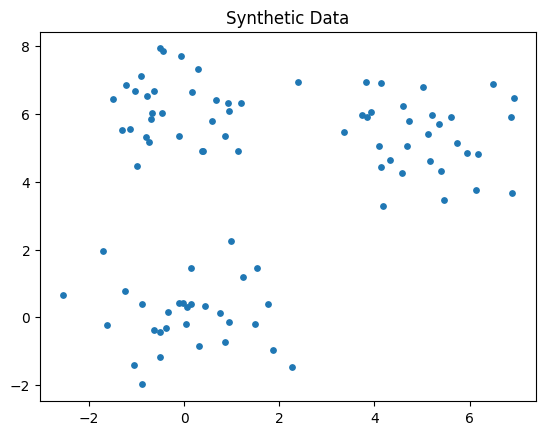

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic 2D data
np.random.seed(0)
X1 = np.random.randn(30, 2) + np.array([0, 0])
X2 = np.random.randn(30, 2) + np.array([5, 5])
X3 = np.random.randn(30, 2) + np.array([0, 6])
X = np.vstack((X1, X2, X3))

plt.scatter(X[:, 0], X[:, 1], s=15)
plt.title("Synthetic Data")
plt.show()

## Helper Functions

In [2]:
def euclidean(a, b):
    return np.linalg.norm(a - b)

def compute_distance_matrix(clusters):
    """Compute pairwise distances between all clusters."""
    n = len(clusters)
    dist_matrix = np.full((n, n), np.inf)

    for i in range(n):
        for j in range(i + 1, n):
            # Use single linkage (minimum pairwise distance)
            d = np.min([euclidean(p1, p2) for p1 in clusters[i] for p2 in clusters[j]])
            dist_matrix[i, j] = dist_matrix[j, i] = d
    return dist_matrix

## Agglomerative Clustering Logic

In [3]:
def agglomerative_clustering(X, num_clusters=3):
    # Start with each point as its own cluster
    clusters = [[point] for point in X]

    while len(clusters) > num_clusters:
        dist_matrix = compute_distance_matrix(clusters)
        i, j = np.unravel_index(np.argmin(dist_matrix), dist_matrix.shape)

        # Merge clusters i and j
        new_cluster = clusters[i] + clusters[j]
        clusters = [clusters[k] for k in range(len(clusters)) if k != i and k != j]
        clusters.append(new_cluster)

    return clusters

## Visualize Final Clusters

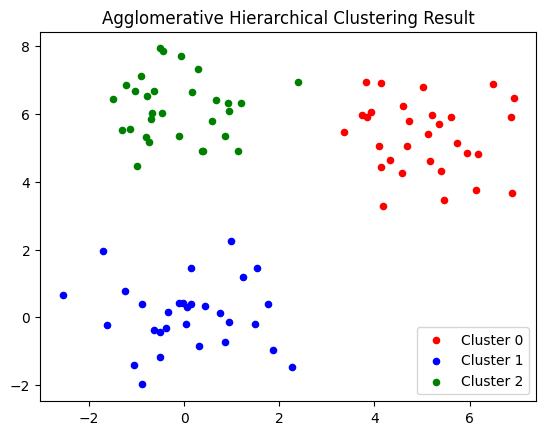

In [4]:
clusters = agglomerative_clustering(X, num_clusters=3)

colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], s=20, color=colors[i], label=f'Cluster {i}')

plt.title("Agglomerative Hierarchical Clustering Result")
plt.legend()
plt.show()


## Summary

- Implemented **Agglomerative Hierarchical Clustering** from scratch
- Learned how clusters merge based on **single linkage distance**
- Visualized the final grouping
- Hierarchical Clustering helps when:
  - The number of clusters is unknown
  - You want to see relationships as a tree (dendrogram)
